<a href="https://colab.research.google.com/github/LimDoHyeon/PKNU-MachineLearning/blob/main/%5BPKNU%5DML_Methods(Regression%2C_Decision_Tree%2C_SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#6.1. 다항식 회귀
- 선형 회귀는 그 해법이 선형 방정식으로 표현되는 것에 유래
- 실제 데이터는 비선형 함수 관계식을 따를 수도 있다. 이때 가정한 입출력 관계식(모델)이 비선형 다항식이며, 따라서 **다항식 회귀(Polynomial Regression)**라고 부를 수 있다. (그러나 해법은 여전히 선형 회귀법이 쓰인다)

---

1. 다항식 회귀에서 데이터를 사전 가공으로 처리한다면 사이킷런의 preprocessing 서브 모듈인 **PolynomialFeatures** Class를 활용 (활용 결과를 입력으로)
2. 클래스 생성 시 차수 지정 후 입력을 fit_transform() 메소드에 넘기면 다항 회귀에 필요한 형태로 변환함. 이것을 **다항식 특징 변환**이라고 함.

ex : 
X3 = PolynomialFeatures(degree = 3).fit_transform(X)
lin_model.fit(X3, y)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')

life.head()

life = life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]

life.dropna(inplace = True) #dropna = ?
X = life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']] #Nx6 설계행렬
y = life['Life expectancy']

- Preprocessing 서브 모듈의 **PolynomialFeatures** 클래스를 활용해 입력 데이터를 다변량 데이터로 변환

In [2]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree = 3)
X = poly_feature.fit_transform(X) #fit_transform 주목, X = '변환된' 다변량 데이터들의 설계 행렬

- 이후는 보통의 (다중) 선형 회귀 계산 실시

Mean squared error :  0.034985365700716815


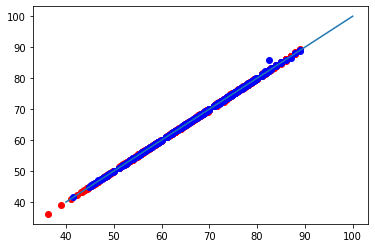

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_hat_train = lin_model.predict(X_train)
y_hat_test = lin_model.predict(X_test)

plt.scatter(y_train, y_hat_train, color='r')
plt.scatter(y_test, y_hat_test, color='b')
plt.plot([40, 100], [40, 100])
print('Mean squared error : ', mean_squared_error(y_test, y_hat_test))
#과적합 모형처럼 보이나, 실제로 데이터가 적어서 그렇지 오류율이 0.0006임을 보면 아주 잘 학습됨을 알 수 있음.

#6.2 다항 회귀의 문제점 - 폭발적인 복잡도 증가, 그리고 과적합
- 다항 회귀를 통해 더 좋은 성능을 가진 회귀 함수를 찾을 수 있으나, 차수가 너무 올라가면 모수가 늘어나서 모형이 복잡해지며 (모수에 비해 데이터가 부족해) 과적합이 발생함.

- 두 가지 문제 case
  1. overfitting : 훈련 데이터 학습은 잘 되나 검증 데이터 예측 성능은 부진함
  2. 차원의 저주 발생 : 다항식 차수 높아질 수록 계산복잡도 증가

#6.3 Overfitting, Underfitting

1. Overfitting : 성능 측면(학습률) 학습 데이터 > 테스트 데이터
  - 발생 원인
    - 데이터셋이 특이한 경우만 추출됨
    - 지나치게 데이터셋이 적음
    - 모델이 너무 복잡함
  - 솔루션 : 정칙화(규제)를 가해서 일반화 능력을 높힘 (ex : L1(Lasso), L2(Ridge))

2. Underfitting : 학습 데이터와 테스트 데이터의 학습률이 너무 낮음
  - 발생 원인
    - 모델이 너무 단순함
    - 예측을 제대로 할 수 없는 특징들만 제공됨
  - 솔루션 : 차수 등의 복잡도를 높임

#6.4 결정 트리를 이용한 분류
> 결정 트리 : 귀납 추론을 위해 자주 사용되는 실용적인 방법

-> 데이터들을 트리 구조의 root에서 시작하여 차례로 중간 노드들을 거쳐 단말(leaf) 노드에 배정


# 6.9 사이킷런의 결정 트리로 붓꽃 분류하기
- Scikitlearn 패키지는 우리가 살펴본 결정 트리를 손쉽게 활용할 수 있는 방법을 제공한다.
  - 분류(Classification)를 학습하면서  다루었던 붓꽃 데이터를 활용하여 결정 트리를 만들어 본다.

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth = 3)
dec_tree.fit(X, y)

#export_graphviz 사용해보기
from sklearn.tree import export_graphviz
export_graphviz(
    dec_tree,
    out_file=("./dec_tree_for_iris.dot"),
    feature_names = iris.feature_names,
)

!ls

dec_tree_for_iris.dot  dec_tree_for_iris.jpg  sample_data


- dot 파일을 jpg나 png 파일로 변환할 수 있음

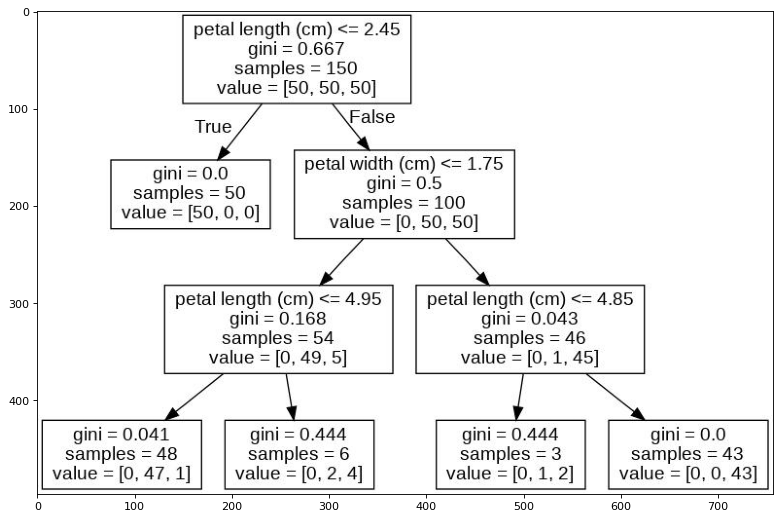

In [11]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12, 8), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.imshow(dec_tree_img)

# 6.10 SVM(Support Vector Machine)의 소개
> 인공 신경망이 딥러닝을 통해 인공지능 분야의 중심으로 떠오르기 전에 가장 각광받던 학습 방법 중의 하나.

- SVM은 두 데이터 유형을 나누는 초평면(hyperplane)을 찾되 간극(margin)의 폭이 가장 넓은 것을 찾는 방법
- 모든 벡터(instance)가 간극을 침범하지 않으면 "하드 마진"이라고 부름 <-> 간극을 허용하면 "소프트 마진"
  - 하드 마진(hard margin) 잡음에 민감 -> 과적합 가능성, 분류 실패 가능
  - 소프트 마진(soft margin) : 간극 안에 어떤 벡터도 허용치 않는 것이 불가능하거나 / 어떤 벡터는 잡음이라고 판단될 때 사용 (보통의 바람직한 방법 + 소프트 마진은 규제로도 작용함)
- 하드 마진이든 소프트 마진이든 간극을 최대로 넓게 만들려고 하기 떄문에 마진의 양쪽엔 서로 다른 그룹에 속하는 데이터들이 하나씩 닿아 있음, 이것을 서포트 벡터라고 함

In [ ]:
#6.11 하드 마진의 구현까지 완료. 다음 학습은 소프트 마진의 구현부터